# Исследование зависимости от заданной размерности и числа обусловленности квадратичных функций

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [14]:
from Functions.user_functions import funtion_generator
from Functions.optimization import armijo_grad_descent, conjugate_grad_descent

In [15]:
# Order.
M_SIZE = 10
M_list = np.linspace(2, 11, M_SIZE).astype(int)

# Condition number µ.
CN_SIZE = 10
CN_list = np.linspace(1.0, 19.0, CN_SIZE)

print(M_list)
print(CN_list)

[ 2  3  4  5  6  7  8  9 10 11]
[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]


In [16]:
A_arr = np.empty((M_SIZE,CN_SIZE), dtype=object)
b_arr = np.empty((M_SIZE,CN_SIZE), dtype=object)
func_arr = np.empty((M_SIZE,CN_SIZE), dtype=object)
grad_func_arr = np.empty((M_SIZE,CN_SIZE), dtype=object)

for m, M_var in enumerate(M_list):
    for k, CN_var in enumerate(CN_list):
        A_arr[m,k], b_arr[m,k], _, func_arr[m,k], grad_func_arr[m,k] = funtion_generator(M=M_var, cond_number=CN_var)

Проверка собственных чисел.

In [17]:
for m, M_var in enumerate(M_list):
    for k, CN_var in enumerate(CN_list):
        eigvals = np.linalg.eigvalsh(A_arr[m,k])
        cond_A = eigvals[-1] / eigvals[0]
        print('Размерность', M_var, ', Собственные числа', eigvals)
        print('Числа обусловленности: заданное <--> вычисленное:\n', CN_var, '<-->', np.round(cond_A,2))

Размерность 2 , Собственные числа [1. 1.]
Числа обусловленности: заданное <--> вычисленное:
 1.0 <--> 1.0
Размерность 2 , Собственные числа [1. 3.]
Числа обусловленности: заданное <--> вычисленное:
 3.0 <--> 3.0
Размерность 2 , Собственные числа [1. 5.]
Числа обусловленности: заданное <--> вычисленное:
 5.0 <--> 5.0
Размерность 2 , Собственные числа [1. 7.]
Числа обусловленности: заданное <--> вычисленное:
 7.0 <--> 7.0
Размерность 2 , Собственные числа [1. 9.]
Числа обусловленности: заданное <--> вычисленное:
 9.0 <--> 9.0
Размерность 2 , Собственные числа [ 1. 11.]
Числа обусловленности: заданное <--> вычисленное:
 11.0 <--> 11.0
Размерность 2 , Собственные числа [ 1. 13.]
Числа обусловленности: заданное <--> вычисленное:
 13.0 <--> 13.0
Размерность 2 , Собственные числа [ 1. 15.]
Числа обусловленности: заданное <--> вычисленное:
 15.0 <--> 15.0
Размерность 2 , Собственные числа [ 1. 17.]
Числа обусловленности: заданное <--> вычисленное:
 17.0 <--> 17.0
Размерность 2 , Собственные чи

In [18]:
N_METH = 2
x_optim_arr = np.empty((N_METH,), dtype=object)
trajectory_arr = np.empty((N_METH,), dtype=object)
iter_counter_arr = np.empty((N_METH,), dtype=object)

# Tolerance.
eps = 1e-3

for idx in range(N_METH):
    x_optim_arr[idx] = np.empty((M_SIZE,CN_SIZE), dtype=object)
    trajectory_arr[idx] = np.empty((M_SIZE,CN_SIZE), dtype=object)
    iter_counter_arr[idx] = np.zeros((M_SIZE,CN_SIZE))

    for m, M_var in enumerate(M_list):
        for k in range(CN_SIZE):
            match idx:
                case 0:
                    x_optim_arr[idx][m,k], trajectory_arr[idx][m,k], iter_counter_arr[idx][m,k], _, _ = armijo_grad_descent(
                        loss_func=func_arr[m,k],
                        grad_func=grad_func_arr[m,k],
                        x_init=np.array([1.5]*M_var),
                        lr_multiplier=0.5,
                        lr_coeff=0.5,
                        tolerance=eps,
                        printoutput=False
                        )
                case 1:
                    x_optim_arr[idx][m,k], trajectory_arr[idx][m,k], iter_counter_arr[idx][m,k], _, _ = conjugate_grad_descent(
                        A=A_arr[m,k],
                        b=b_arr[m,k],
                        x_init=np.array([1.5]*M_var),
                        tolerance=eps,
                        printoutput=False
                        )

In [19]:
iter_counter_arr

array([array([[ 1., 12., 18., 25., 21., 42., 31., 29., 24., 45.],
              [12., 12., 16., 27., 21., 34., 37., 46., 22., 48.],
              [ 6., 13., 17., 13., 21., 34., 35., 59., 30., 43.],
              [ 2., 11., 15., 30., 23., 34., 41., 52., 27., 51.],
              [12., 12., 17., 19., 18., 32., 34., 36., 34., 45.],
              [12., 12., 16., 27., 22., 37., 35., 54., 29., 27.],
              [ 2., 12., 17., 24., 20., 31., 31., 29., 34., 41.],
              [ 2., 11., 17., 29., 18., 34., 36., 33., 23., 41.],
              [ 2., 13., 14., 19., 18., 39., 34., 53., 27., 41.],
              [ 2., 13., 12., 18., 21., 40., 38., 35., 34., 37.]]),
       array([[ 1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
              [ 2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
              [ 2.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
              [ 2.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
              [ 2.,  6.,  6.,  5.,  6.,  6.,  6.,  6.,  6.,  6.],
        

Настройки форматирования графиков.

In [20]:
user_figsize = (10,5)
user_fontsize = 14
user_tickfontsize = 12

In [21]:
CN_PLOT = CN_list[0:3]

x1_min = -10.0
x1_max = 10.0
x2_min = -10.0
x2_max = 10.0
N = 1000

x = np.empty((2,), dtype=object)
x[0] = np.linspace(x1_min, x1_max, N)
x[1] = np.linspace(x2_min, x2_max, N)
X, Y = np.meshgrid(x[0], x[1])

N_FUNC = len(CN_PLOT)

Z = np.empty((N_FUNC,), dtype=object)

for k, CN_var, func in zip(range(N_FUNC), CN_PLOT, func_arr[0,:]):
    Z[k] = np.zeros((X.shape[0],X.shape[1]))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[k][i,j] = func(np.array([X[i,j], Y[i,j]]))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

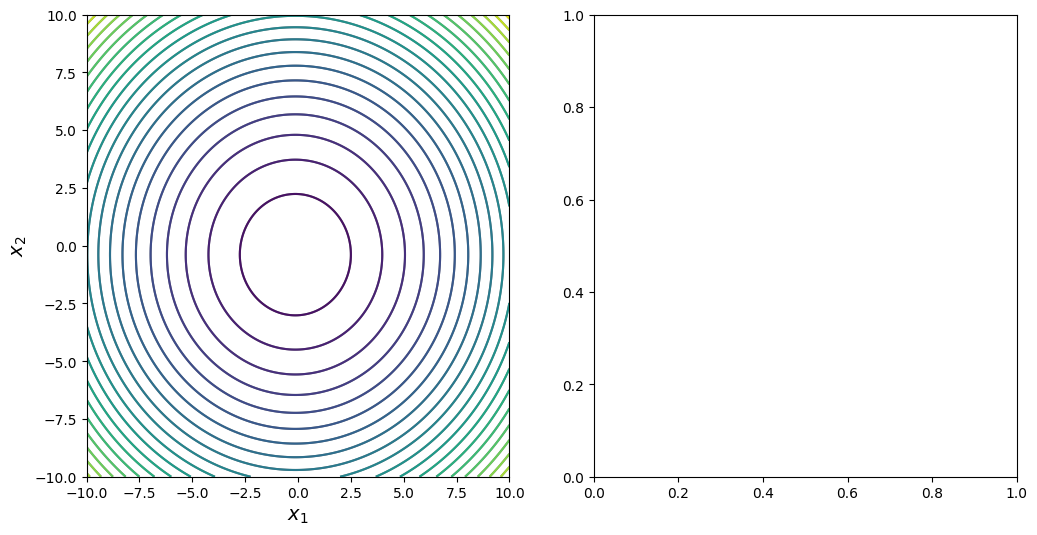

In [ ]:
# Начальное приближение.
x_init = np.array([1.5]*2)
#for ndx, z, func_lbl in zip(range(N_FUNC), Z, func_labels):
#    print(func_lbl)
for idx, z in zip(range(N_FUNC), Z):
    fig, axs = plt.subplots(ncols=N_METH, nrows=1, figsize=(6*N_METH, 6))
    for k, ax in enumerate(axs):
        contour = ax.contour(X, Y, z, levels=25, colors='black', alpha=0.5)
        ax.contour(X, Y, z, levels=25, cmap='viridis')
        ax.set_xlabel('$x_1$', fontsize=user_fontsize)
        ax.set_ylabel('$x_2$', fontsize=user_fontsize)
        #ax.set_title(method_names[mdx].__name__ + ': ' + str(iter_counter_arr[ndx,mdx]) + ' iterations', fontsize=user_fontsize)
        
        # Подготовка сегментов для LineCollection
        points = np.array([trajectory_arr[0,k][:, 0], trajectory_arr[0,k][:, 1]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # Создание LineCollection с цветами, зависящими от индекса (шага)
        lc = LineCollection(segments, cmap='RdYlBu_r', linewidth=1.0)
        lc.set_array(np.linspace(0, 1, len(segments))) # цвет от 0 (начало) до 1 (конец)
        line = ax.add_collection(lc)
        
        # Отмечаем точки
        ax.plot(x_init[0], x_init[1], 'bo', markersize=8, label='Start')
        ax.plot(x_optim_arr[0,k][0], x_optim_arr[0,k][1], 'ro', markersize=10, label='End')
            
        ax.tick_params(axis='x', labelsize=user_tickfontsize)
        ax.tick_params(axis='y', labelsize=user_tickfontsize)
        
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    #plt.savefig('readme_img/func_img/trajectory_plots_' + func_lbl + '.png', bbox_inches='tight')
    plt.show()